In [24]:
# WIKI - Metin Önişleme ve Görselleştirme

import pandas as pd
import matplotlib .pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)


In [25]:
df = pd.read_csv('C:/Users/misra/Desktop/Masaüstü/wiki/wiki_data.csv')
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [26]:
df = df[:2000]
df.head()
df.shape

(2000, 2)

In [27]:
def clean_text(text):
    text = text.str.lower()
    text = text.str.replace(r'[^\w\s]', '')
    text = text.str.replace("\n", '')

    text = text.str.replace('\d', '')
    return text

In [28]:
df["text"] = clean_text(df["text"])
df.head()

,Unnamed: 0,text
0,1,anovoanovo (formerly a novo) is a computer ser...
1,2,battery indicatora battery indicator (also kno...
2,3,"bob peaserobert allen pease (august 22, 1940â ..."
3,4,cavnetcavnet was a secure military forum which...
4,5,clidarthe clidar is a scientific instrument us...


In [29]:
def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

df["text"] = remove_stopwords(df["text"])

In [30]:
pd.Series(' '.join(df["text"]).split()).value_counts()[-1000:]

1863;              1
prentice           1
guncotton.small    1
wolfsberg          1
lenk               1
                  ..
m.52               1
sub-sonic          1
attlee's           1
1949.the           1
fluids/solids      1
Name: count, Length: 1000, dtype: int64

In [31]:
sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [32]:
df["text"].apply(lambda x: TextBlob(x).words)


0       [anovoanovo, formerly, novo, computer, service...
1       [battery, indicatora, battery, indicator, also...
2       [bob, peaserobert, allen, pease, august, 22, 1...
3       [cavnetcavnet, secure, military, forum, became...
4       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1995    [edinburgh, calotype, clubthe, edinburgh, calo...
1996    [endrinendrin, organochloride, chemical, formu...
1997    [ethylene, glycol, dinitrateethylene, glycol, ...
1998    [forges, de, syamthe, forges, de, syam, syam, ...
1999    [frank-kamenetskii, theoryin, combustion, fran...
Name: text, Length: 2000, dtype: object

In [33]:
#Lemmatization
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,Unnamed: 0,text
0,1,anovoanovo (formerly novo) computer service co...
1,2,battery indicatora battery indicator (also kno...
2,3,"bob peaserobert allen pea (august 22, 1940â â€..."
3,4,cavnetcavnet secure military forum became oper...
4,5,clidarthe clidar scientific instrument used me...


In [34]:
#Metindeki terimlerin frekanslarını hesaplama
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.head()

,index,0
0,company,1862.00
1,anovoanovo,1.00
2,1.6,3.00
3,four,473.00
4,year,907.00


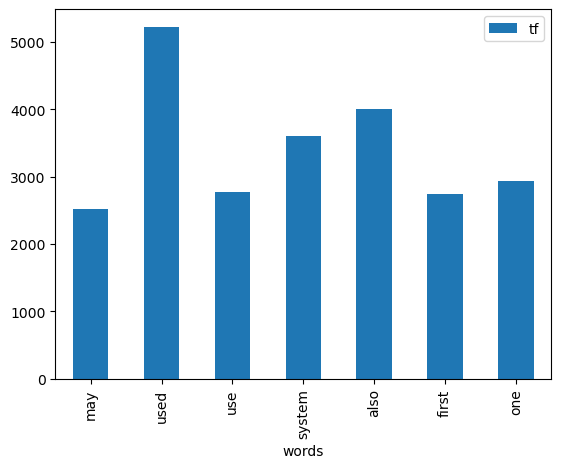

In [35]:
# Barplot grafiği
tf.columns = ["words", "tf"]
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

In [37]:
text = " ".join(i for i in df["text"])


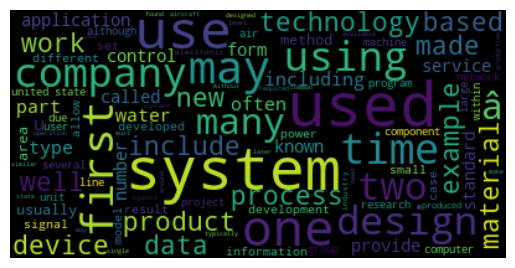

In [39]:
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
df = pd.read_csv('C:/Users/misra/Desktop/Masaüstü/wiki/wiki_data.csv', index_col=0)

In [51]:
def wiki_preprocess(text, Barplot=False, Wordcloud=False):

    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace("\n", '')
    # Numbers
    text = text.str.replace('\d', '')
    # Stopwords
    sw = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    # Rarewords / Custom Words
    sil = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in sil))


    if Barplot:
        # Terim Frekanslarının Hesaplanması
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        # Sütunların isimlendirilmesi
        tf.columns = ["words", "tf"]
        # 5000'den fazla gelen kelimelerin görselleştirilmesi
        tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
        plt.show()

    if Wordcloud:
        # Kelimeleri birleştirdik
        text = " ".join(i for i in text)
        # wordcloud görselleştirmenin özelliklerini belirliyoruz
        wordcloud = WordCloud(max_font_size=50,
                              max_words=100,
                              background_color="white").generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    return text

In [52]:
wiki_preprocess(df["text"])

wiki_preprocess(df["text"], True, True)

MemoryError: 